In [1]:
%pip install --upgrade langchain openai  -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sentence_transformers -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
%apt-get install poppler-utils  

UsageError: Line magic function `%apt-get` not found.


In [5]:
%pip install tabulate
%pip install pdf2image

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# Define root domain to crawl
domain = "xx.com"
full_url = "https://xx.com/"

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))

def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_").replace("?","_").replace("%","_").replace("~","_").replace(",","_").replace("=","_").replace(":","_") + ".txt", "w", encoding="utf-8") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")
            
            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)
crawl(full_url)


https://srijanshachi.com/
https://srijanshachi.com/videos
https://srijanshachi.com/contact
https://srijanshachi.com
HTTP Error 429: Too Many Requests
https://srijanshachi.com/gallery
https://srijanshachi.com/gallery/celebratingwomen
https://srijanshachi.com/matritwa-anchal
https://srijanshachi.com/i-am-shachi
HTTP Error 429: Too Many Requests
https://srijanshachi.com/the-empowered
https://srijanshachi.com/volcanomermaid
https://srijanshachi.com/prajwala
https://srijanshachi.com/bhumi-2-mother-earth
HTTP Error 429: Too Many Requests
https://srijanshachi.com/gallery/customartworks
https://srijanshachi.com/together-forever
https://srijanshachi.com/wine-dine
https://srijanshachi.com/treasures-of-india
https://srijanshachi.com/bhumi-4-mother-earth-custom
https://srijanshachi.com/golden-anniversary
https://srijanshachi.com/neel-ganesh-3
https://srijanshachi.com/neel-ganesh
https://srijanshachi.com/shiva-shakti
https://srijanshachi.com/with-love
https://srijanshachi.com/matritwa-anchal-3
http

In [4]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [10]:
import pandas as pd

# Create a list to store the text files
texts=[]
domain="xx.com"

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r", encoding="utf8") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

C:\Users\aravs\AppData\Local\Temp\ipykernel_22452\2931785837.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,.com,.com . Spear Growth - SEO Enablement & Perfor...
1,.com blog,.com blog. B2B SaaS Marketing Blog - Spear Gr...
2,.com blog brand adjectives for your brand pers...,.com blog brand adjectives for your brand pers...
3,.com blog brand adjectives for your brand pers...,.com blog brand adjectives for your brand pers...
4,.com blog brand adjectives for your brand pers...,.com blog brand adjectives for your brand pers...


<Axes: >

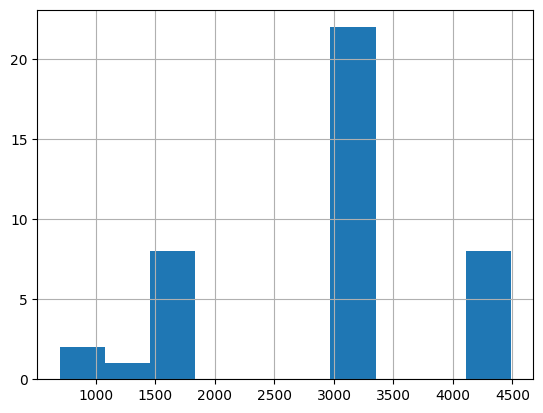

In [11]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [12]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<Axes: >

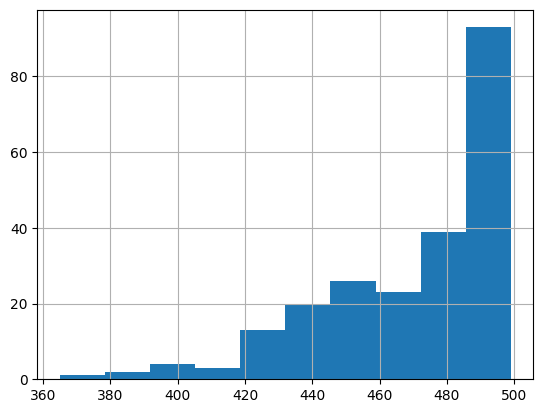

In [13]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [14]:
import openai
openai.api_key = ""

df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])
df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,.com . Spear Growth - SEO Enablement & Perfor...,494,"[-0.008135132491588593, -0.0023651495575904846..."
1,.com blog. B2B SaaS Marketing Blog - Spear Gr...,469,"[-0.010670383460819721, -0.009135126136243343,..."
2,"by Ishaan Shakunt, Navin Israni read ...",491,"[0.0028490095864981413, -0.007873747497797012,..."
3,.com blog brand adjectives for your brand pers...,444,"[-0.0017360022757202387, 0.02349674142897129, ..."
4,The only way you can make your audience choose...,427,"[-0.008116474375128746, 0.006528468336910009, ..."


In [15]:
import pandas as pd
import numpy as np
from openai.embeddings_utils import distances_from_embeddings, cosine_similarity

df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,.com . Spear Growth - SEO Enablement & Perfor...,494,"[-0.008135132491588593, -0.0023651495575904846..."
1,.com blog. B2B SaaS Marketing Blog - Spear Gr...,469,"[-0.010670383460819721, -0.009135126136243343,..."
2,"by Ishaan Shakunt, Navin Israni read ...",491,"[0.0028490095864981413, -0.007873747497797012,..."
3,.com blog brand adjectives for your brand pers...,444,"[-0.0017360022757202387, 0.02349674142897129, ..."
4,The only way you can make your audience choose...,427,"[-0.008116474375128746, 0.006528468336910009, ..."


In [2]:

from langchain.document_loaders import DirectoryLoader




directory = 'C:/Users/aravs/OneDrive/Desktop/Coding stuff/Pythonstuff/custom-chatbot/data'

def load_docs(directory):
  loader = DirectoryLoader(directory)
  documents = loader.load()
  return documents

documents = load_docs(directory)
len(documents)

2

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def split_docs(documents,chunk_size=500,chunk_overlap=20):
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
  docs = text_splitter.split_documents(documents)
  return docs

docs = split_docs(documents)
print(len(docs))

56


In [4]:
print(docs[1].page_content)

a. Get together of Department leads, Division Heads, Directors and MD san b. Division wise get togethers

Method for Team Get Togethers:

1. Informal get togethers of each type can be arranged once in 6 months in around June or November of the year. 2. Such gatherings must not affect regular working of the team members. Hold the meeting during non-business

hours, including travel time.


In [43]:
#requires for open ai embedding
# !pip install tiktoken -q

In [5]:
# import openai
# from langchain.embeddings.openai import OpenAIEmbeddings
# embeddings = OpenAIEmbeddings(model_name="ada")
from langchain.embeddings import SentenceTransformerEmbeddings
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Users\aravs\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
query_result = embeddings.embed_query("Hello world")
len(query_result)

384

In [14]:
%pip install pinecone-client -q

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pinecone 
from langchain.vectorstores import Pinecone
# initialize pinecone
pinecone.init(
    api_key="",  # find at app.pinecone.io
    environment="us-east4-gcp"  # next to api key in console
)

index_name = "langchain-chatbot"

index = Pinecone.from_documents(docs, embeddings, index_name=index_name)

In [8]:
def get_similiar_docs(query,k=1,score=False):
  if score:
    similar_docs = index.similarity_search_with_score(query,k=k)
  else:
    similar_docs = index.similarity_search(query,k=k)
  return similar_docs

query = "What are the team get togethers"
similar_docs = get_similiar_docs(query)
similar_docs

[Document(page_content='3. The Division wise team gathering can be arranged in smaller groups as per work calendar 4. The team gathering budget will be borne by Division concerned 5. One team member of Division can attend the get together once in six months only 6. All team members must maintain discipline and uphold the image of the organization during the get together,', metadata={'source': 'C:\\Users\\aravs\\OneDrive\\Desktop\\Coding stuff\\Pinecone-Langchain-Gpt-chatbot-7\\data\\Get together rules V3 June 23.pdf'})]